<a href="https://colab.research.google.com/github/NishatTasnim01/Numerical-Methods/blob/main/Newton_Raphson_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Let's consider the following Non-Linear Equation :
$$ f(x) = x^3 - 0.165x^2 + 3.993\times 10^{-4} = 0 $$
We will try to find its root using Newton-Raphson Method. Let's plot the function first

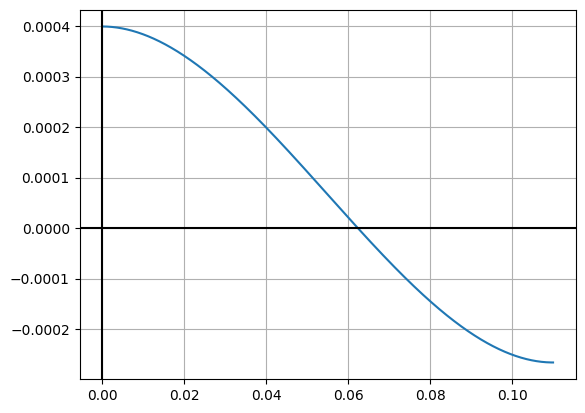

In [ ]:
def non_linear_func(x):
    return x**3 - 0.165*x**2 + 3.993*10**(-4)

x = np.linspace(0, 0.11, 1000)
y = non_linear_func(x)

plt.plot(x, y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.show()

The derivative of the function is :
$$ f'(x) = 3x^2 - 0.33x $$

In [ ]:
def f_prime(x):
    return 3*x**2 - 0.33*x

# Newton Raphson Method
The steps of the Newton-Raphson method to find the root of an equation $f(x) = 0$ are
1. Evaluate $f'(x)$ symbolically
2. Use an initial guess of the root, $x_i$ , to estimate the new value of the root, $x_{i+1}$ , as
$$
    x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
$$
3. Find the absolute relative approximate error, $|\epsilon_{a}|$ , as
$$
|\epsilon_{a}| = \left| \frac{x_{i+1} - x_i}{x_{i+1}} \right| \times 100 \%
$$
4. Compare the absolute relative approximate error with the pre-specified relative
error tolerance, $\epsilon_{s}$ . If $|\epsilon_{a}| > \epsilon_{s}$ , then go to Step 2, else stop the algorithm. Also, check if the number of iterations has exceeded the maximum number of iterations allowed. If so, one needs to terminate the algorithm and notify the user.

In [ ]:
def arae(x_prev, x_pres): #function of absolute relative approximation error
    return abs((x_pres - x_prev)/x_pres) * 100

def plot(f, f_prime, x0, new_x):
    x = np.linspace(0, 0.11, 1000)
    y = f(x)

    plt.plot(x, y, 'b', label='f(x)', linewidth=3) #drawing the curve at each iteration
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.axvline(x=new_x, color='g', linestyle='--', label='$x_{i+1}$') #plot the new point of x vertically

    #draw the tangent line for
    x1 = np.linspace(x0-0.05, x0+0.05, 100)
    y1 = f_prime(x0)*(x1-x0) + f(x0) #equation of drawing linear line

    plt.plot(x1, y1, 'r', label='f\'(x)') # drawing the slope at w.r.t the point x0
    plt.axvline(x=x0, color='orange', linestyle='--', label='$x_{i}$')
    plt.scatter(x0, f(x0), color='r') #speicify the point x0,f(x0) in the graph
    plt.grid()
    plt.legend()
    plt.show()


def newton_raphson(f, f_prime, x0, error_tol, max_iter):
    error = 1e10
    for i in range(max_iter):
        x = x0 - f(x0)/f_prime(x0)
        plot(f, f_prime, x0, x)
        error = arae(x0, x)
        if error < error_tol:
            print("Converged")
            print(f"Error after iteration {i+1}: {error}")
            return x
        x0 = x
        print(f"Value of x after iteration {i+1}: {x}")
        print(f"Error after iteration {i+1}: {error}")
        print()
    return x

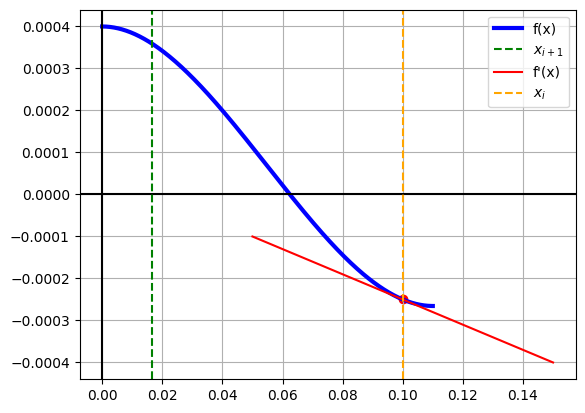

Value of x after iteration 1: 0.01643333333333316
Error after iteration 1: 508.5192697768827



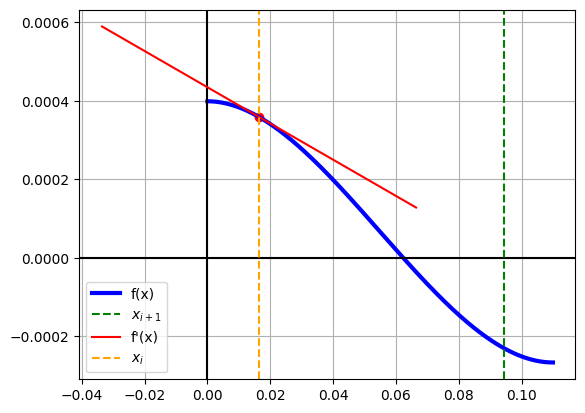

Value of x after iteration 2: 0.09429841664874232
Error after iteration 2: 82.57305486416952



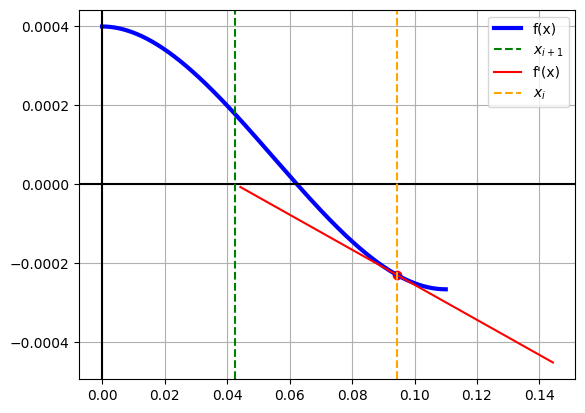

Value of x after iteration 3: 0.042655687778369464
Error after iteration 3: 121.06879893414985



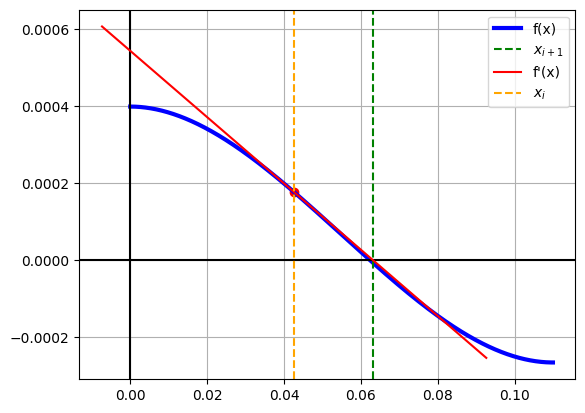

Value of x after iteration 4: 0.06315888783266142
Error after iteration 4: 32.4628896389292



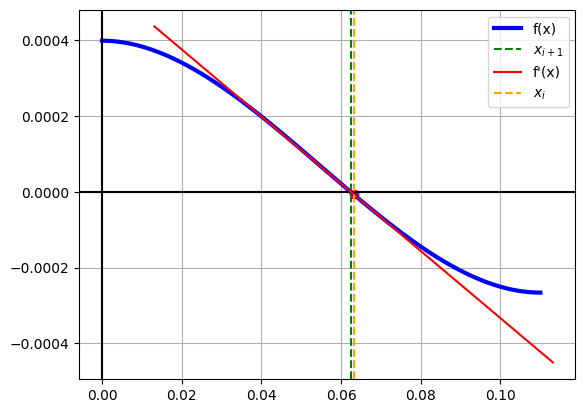

Value of x after iteration 5: 0.06237595175618214
Error after iteration 5: 1.2551889861972145



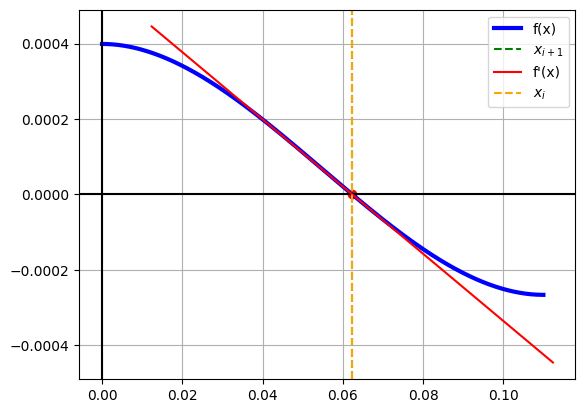

Converged
Error after iteration 6: 0.0026127190769776377


0.06237758150715393

In [ ]:
newton_raphson(non_linear_func, f_prime, 0.1, 0.01, 100)